In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus

In [2]:
#col_names=['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19',
          #'V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount','Class']
detect=pd.read_csv(r'C:\Users\mrash\Desktop\creditcard.csv')

In [3]:
detect.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
details_col=['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19',
          'V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount']
details=detect[details_col]
Fraud=detect.Class

In [5]:
details_train,details_test,Fraud_train,Fraud_test = train_test_split(details,Fraud,test_size=0.2,random_state=1)


In [6]:
d_tree=DecisionTreeClassifier()
d_tree = d_tree.fit(details_train,Fraud_train)
dt_Fraud_pred= d_tree.predict(details_test)

In [7]:
confusion_matrix(Fraud_test, dt_Fraud_pred)

array([[56855,    20],
       [   25,    62]], dtype=int64)

In [8]:
dt_cm=confusion_matrix(Fraud_test, dt_Fraud_pred)

In [9]:
dt_acc=round(dt_cm[1][1]/(dt_cm[1][1]+dt_cm[1][0]),3)
print("Decision Tree Model Accuracy of correctly detecting a Fraud: "+str(dt_acc*100)+"%")

Decision Tree Model Accuracy of correctly detecting a Fraud: 71.3%


In [10]:
naive_b = GaussianNB()
naive_b.fit(details_train,Fraud_train)
nb_Fraud_pred = naive_b.predict(details_test)
probs = naive_b.predict_proba(details_test)

In [11]:
confusion_matrix(Fraud_test, nb_Fraud_pred)

array([[56526,   349],
       [   34,    53]], dtype=int64)

In [12]:
cm=confusion_matrix(Fraud_test, nb_Fraud_pred)

In [13]:
acc=round(cm[1][1]/(cm[1][1]+cm[1][0]),3)
print("Naive Bayes Model Accuracy of correctly detecting a Fraud: "+str(acc*100)+"%")

Naive Bayes Model Accuracy of correctly detecting a Fraud: 60.9%


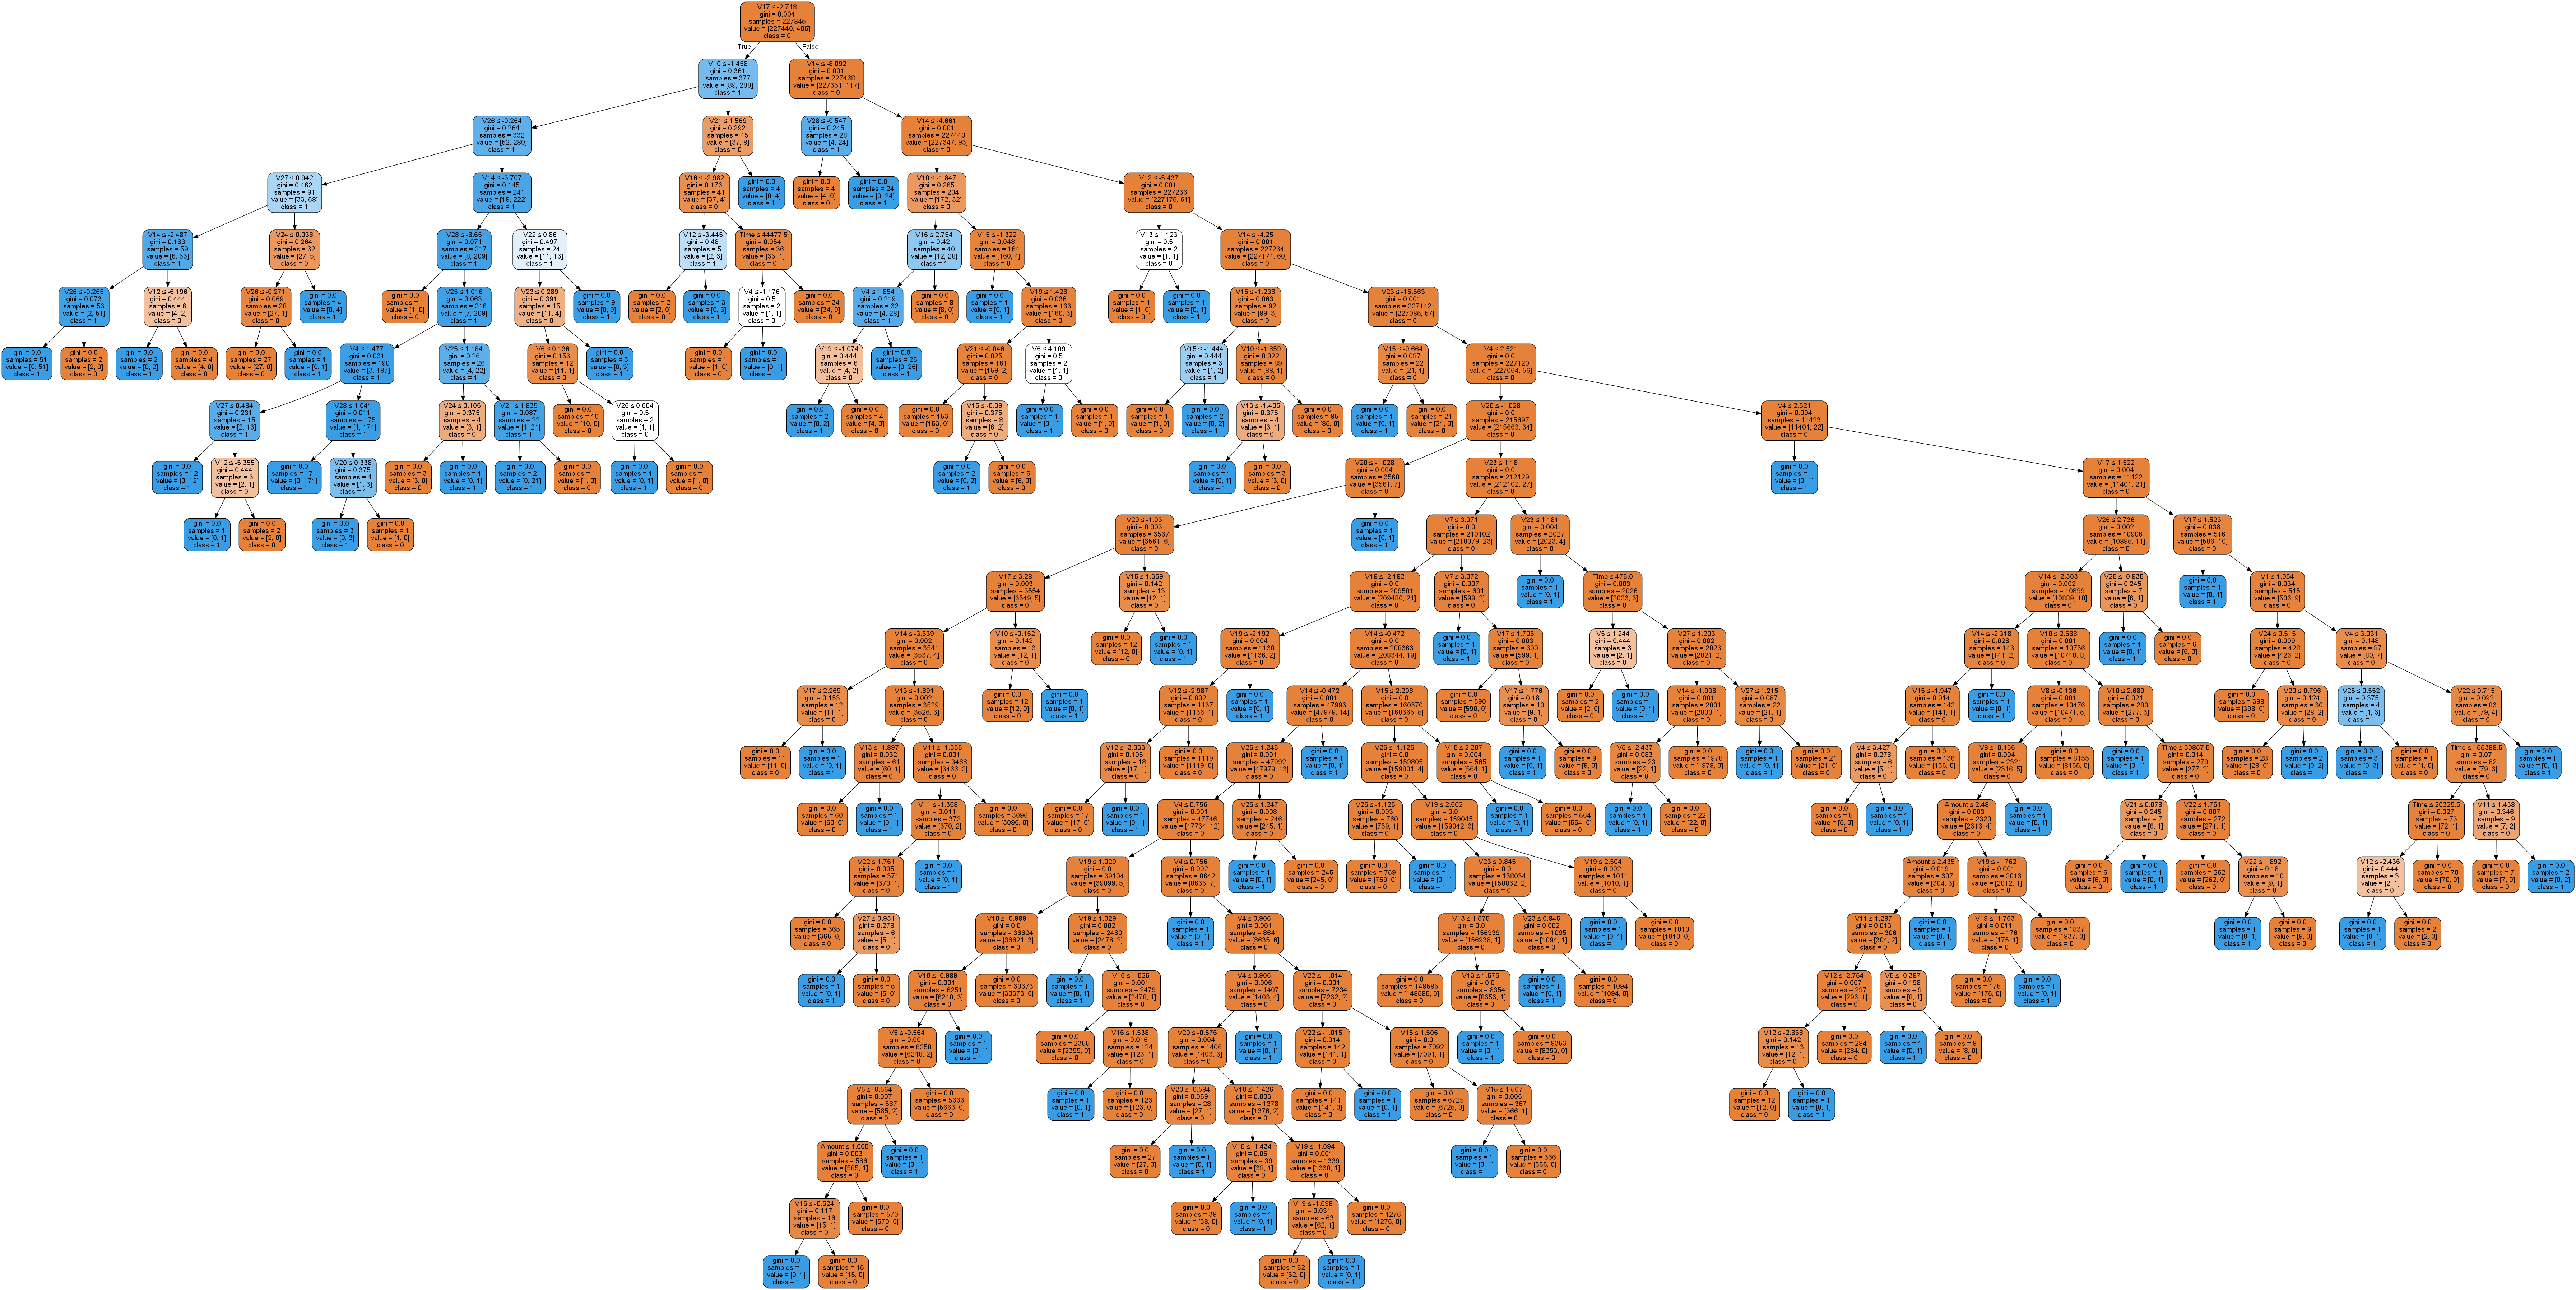

In [14]:
dot_data = StringIO()
export_graphviz(d_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = details_col,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Decision Tree Fraud.png')
Image(graph.create_png())

In [15]:
#running decision tree again with entropy as attribute selection and max depth of 3

In [16]:
d_tree_entropy=DecisionTreeClassifier(criterion="entropy",max_depth=3)
d_tree_entropy = d_tree_entropy.fit(details_train,Fraud_train)
dt_Fraud_entropy_pred= d_tree_entropy.predict(details_test)

In [17]:
confusion_matrix(Fraud_test, dt_Fraud_entropy_pred)

array([[56854,    21],
       [   19,    68]], dtype=int64)

In [18]:
de_cm=confusion_matrix(Fraud_test, dt_Fraud_entropy_pred)

In [19]:
de_acc=round(de_cm[1][1]/(de_cm[1][1]+de_cm[1][0]),3)
print("Optimized Decision Tree Model Accuracy: "+str(de_acc*100)+"%")

Optimized Decision Tree Model Accuracy: 78.2%


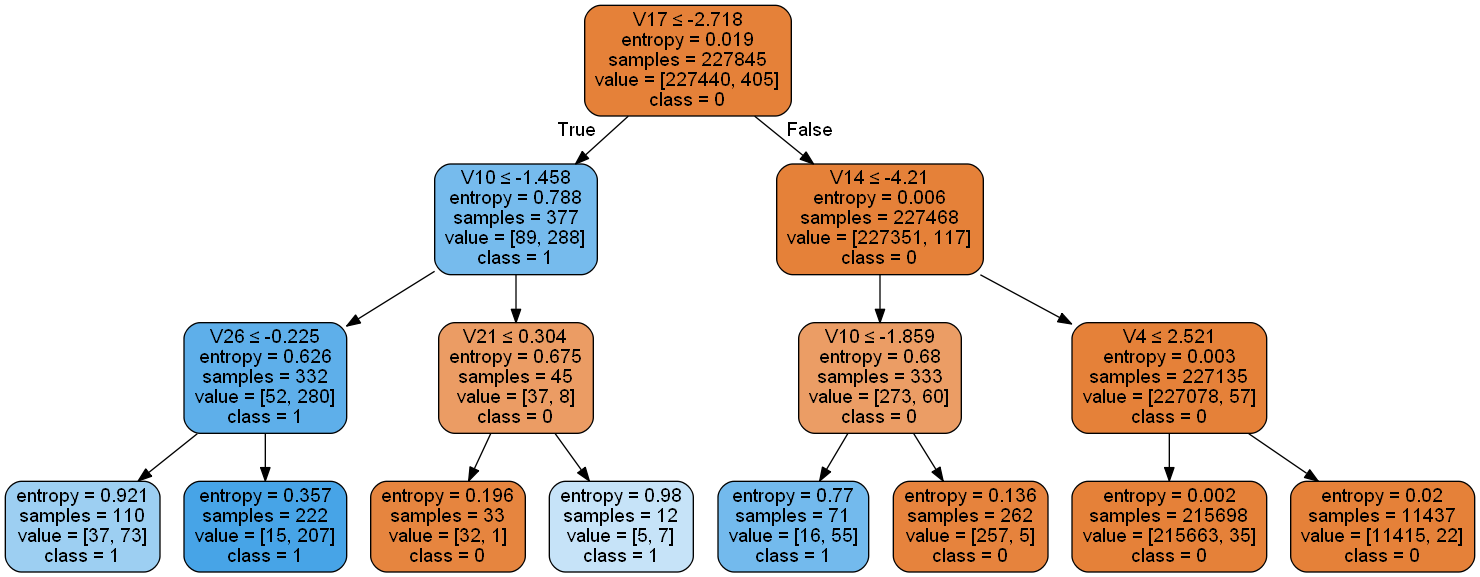

In [20]:
dot_data = StringIO()
export_graphviz(d_tree_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = details_col,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Optimized Decision Tree Fraud.png')
Image(graph.create_png())